In [1]:
% matplotlib inline

In [2]:
import os
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import FIG_DIR, DATA_DIR


In [3]:
figure_data_file = os.path.join(FIG_DIR, 'fig_1_data.csv')
if not os.path.exists(figure_data_file):
    df = pd.read_csv(os.path.join(DATA_DIR, 'MFP.csv'))
    # days date mapping
    days_ref = np.load(os.path.join(DATA_DIR, 'days_date_mapping.npy')).item()
    # reverse
    date_ref = {v: k for k, v in days_ref.items()}

    def records_by_date(df):
        # number of all users & new users 
        df_users = df.groupby('days')['uid'].apply(set).reset_index()
        # users active on the day
        df_users['active_users'] = df_users['uid'].apply(len)
        # current all users in user base
        user_dic = df_users.set_index('days').to_dict()['uid']
        ## assign weekday
        mfp_initial_date = '2014-09-14'
        date_format = "%Y-%m-%d"
        # initial date falls on which weekday
        mfp_offset = datetime.strptime(mfp_initial_date, date_format).weekday() + 1
        print("First day of record {} is the {}th day of the week.".format(mfp_initial_date, mfp_offset))
        # test date after passing 7 training & 1 validation days
        train_val_test_offset = 0
        df_users['weekday'] = df_users['days'].apply(lambda t: (t + mfp_offset - 1) % 7 + 1)
        # assign date
        df_users['date'] = df_users['days'].apply(lambda s: date_ref[s])
        return df_users

    df_users = records_by_date(df)
    cols = [l for l in df_users.columns if l != 'uid']
    df_users[cols].to_csv(figure_data_file, index=False)


# Plot accordfing to guid line with seaborn

In [4]:
def plot_fig1(df, col='active_users', context="paper"):
    # set background param
    if context == 'paper':
        plt.rc('pdf', fonttype=42)
        sns.set(style="ticks")
        sns.set_context(context, font_scale=1.3)
        fig, ax1 = plt.subplots(figsize=(6, 3))
        c1, c2, c3 = plt.cm.tab10(0), plt.cm.tab10(2), plt.cm.tab10(3)
    else:
        plt.rc('pdf')
        sns.set(style="whitegrid")
        sns.set_context(context)
        fig, ax1 = plt.subplots(figsize=(12, 6))
        c1, c2, c3 = sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[3]

    # data for plot
    data1 = df[col]
    t = pd.to_datetime(df['date'])

    # plot line
    ax1.plot(t, data1, color=c1, label='Active users')

    # plot points
    mask = df[df['weekday'] < 6].index
    mask2 = df[df['weekday'] >= 6].index
    if context == 'paper':
        green_dot, = ax1.plot_date(np.array(t)[mask], np.array(data1)[mask],
                                   marker='o', color=c2, label='Weekdays')
        red_dot, = ax1.plot_date(np.array(t)[mask2], np.array(data1)[mask2],
                                 marker='v', color=c3, label='Weekends')
        ax1.grid(ls="dotted")
        ax1.set_ylim(top=4500, bottom=1000)
        plt.legend(handles=[green_dot, red_dot], loc='upper left', borderaxespad=0., frameon=True)
    else:
        green_dot, = ax1.plot_date(np.array(t)[mask], np.array(data1)[mask],
                                   marker='o', color=c2, ms=8, label='Weekdays')
        red_dot, = ax1.plot_date(np.array(t)[mask2], np.array(data1)[mask2],
                                 marker='v', color=c3, ms=8, label='Weekends')
        ax1.grid(axis='x')
        ax1.set_ylim(top=4500, bottom=1100)
        plt.legend(handles=[green_dot, red_dot], loc='upper left', borderaxespad=0., frameon=True)

    sns.despine(offset=10)

    # ticks & legend
    ax1.set_xlabel('Date')
    ax1.set_ylabel('# Active users')
    months = mdates.MonthLocator()  # every month
    ax1.xaxis.set_major_locator(months)
    monthFmt = mdates.DateFormatter("%b'%y")
    ax1.xaxis.set_major_formatter(monthFmt)

    # save figure
    fig.tight_layout()
    if context == "paper":
        figure_name = os.path.join(FIG_DIR, 'paper_fig_1.png')
    else:
        figure_name = os.path.join(FIG_DIR, 'fig_1.png')
    plt.savefig(figure_name, dpi=200, transparent=False)
    plt.show()


In [5]:
df_users = pd.read_csv(figure_data_file)

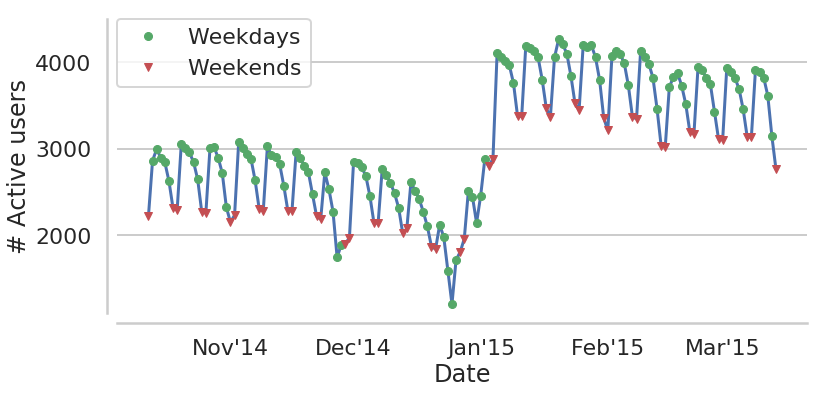

In [6]:
plot_fig1(df_users, context="poster")

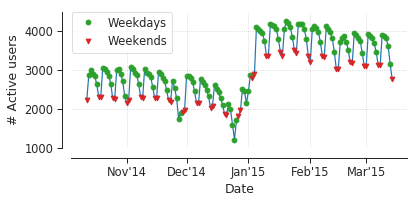

In [7]:
plot_fig1(df_users, context="paper")